In [157]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv("./data/housingdata.csv", header = None)
housing_colums_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = housing_colums_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


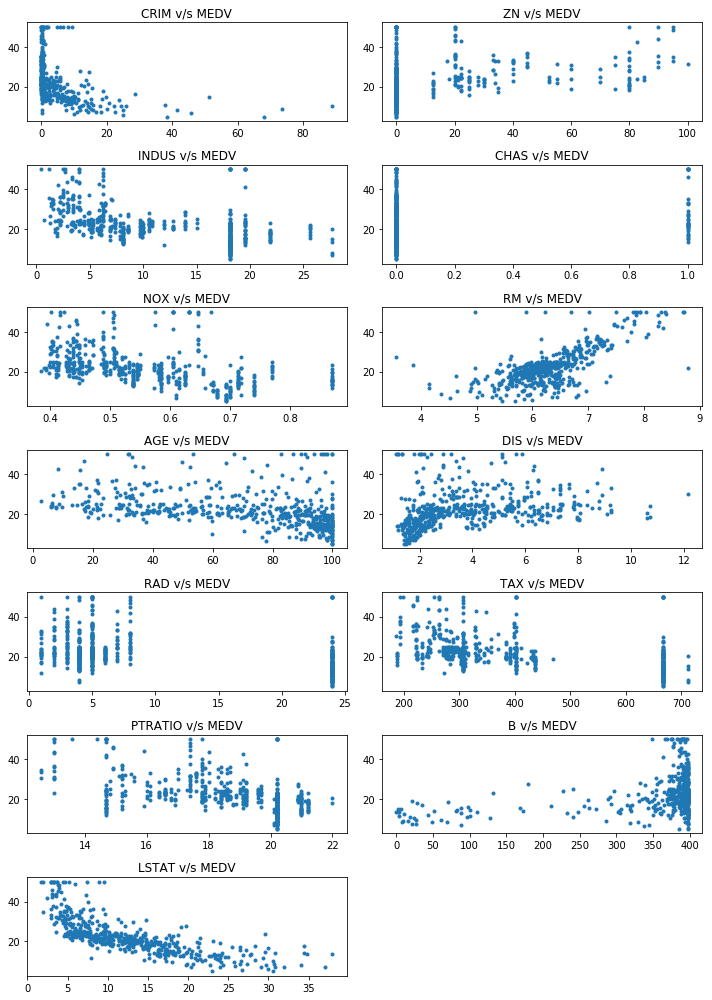

In [23]:
def plot_features(dataset,dep_params,indep_params_list):
    plt.figure(figsize=(10, 14))
    i=0;
    for val in indep_params_list:
        if (val == dep_params):break
        i+=1
        plt.subplot(7,2,i)
        plt.plot(dataset[val], dataset[dep_params], marker='.',linestyle='none')
        plt.title(val + " v/s " + dep_params)
        plt.tight_layout()
plot_features(df,"MEDV",housing_colums_names)
    
    

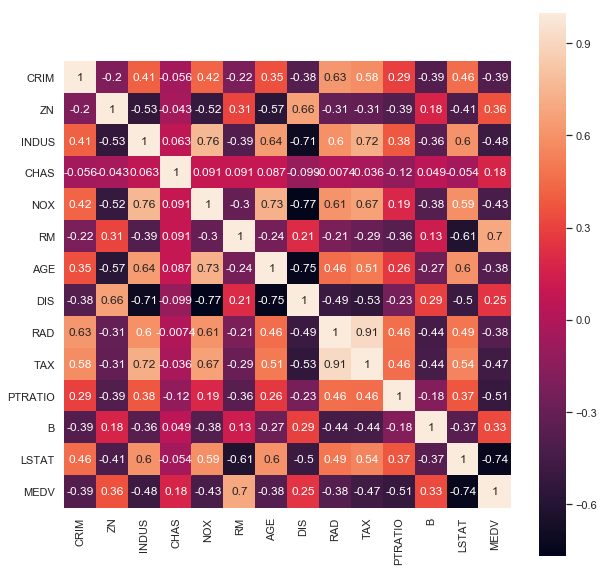

In [67]:
# Correlation of features using seaborn
plt.subplots(figsize=(10, 10))
sb.set(font_scale=1)
sb.heatmap(df.corr(), square= True, cbar= True, annot= True)
plt.show()


In [179]:
def evaluate_cost(x,y,theta0,theta1, no_of_smps):
    return (sum_sqrs_err(x,y,theta0,theta1))/ 2 * no_of_smps

def sum_sqrs_err(x,y,theta0,theta1):
    sum_of_err = 0.0
    for i,j in zip(x,y):
        sum_of_err += (theta0 + theta1*i - j)**2
    return sum_of_err



In [212]:
def gradient_descent(x,y,alpha,max_iter):
    converged = False
    iter = 0
    m = len(x)
    t0 = np.random.random()
    t1 = np.random.random()
    costs=[None] * max_iter
    init_cost = evaluate_cost(x,y,t0,t1,m)
    
    while not converged:
        grad0 = 1.0/m*(sum([(t0+t1*i-j) for i,j in zip(x,y)]))
        grad1 = 1.0/m*(sum([(t0+t1*i-j)*i for i,j in zip(x,y)]))
        
        t0 = t0 - alpha * grad0
        t1 = t1 - alpha * grad1
        
        cost=evaluate_cost(x,y,t0,t1,m)
        costs[iter]=cost
        if abs(init_cost - cost < 0.0001):
            print("Converged successfully on Iteration")
            converged = True
        
        if (iter == max_iter-1):
            converged = True
        
        init_cost = cost
        iter+=1
        
    return t0,t1, costs;

theta0, theta1, cost_list = gradient_descent(df["RM"], df["MEDV"], 0.047, 5000)
print('Regression coefficients: theta0=%.3f theta1=%.3f' % (theta0, theta1))

Regression coefficients: theta0=-32.582 theta1=8.774


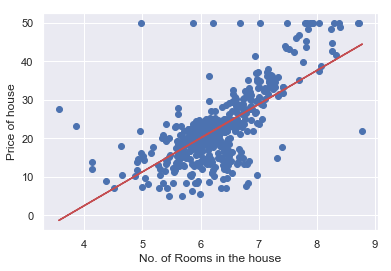

In [213]:
def plot_regression_line(dep_params, indep_params, theta0,theta1):
    plt.scatter(dep_params,indep_params)
    plt.plot(df["RM"], theta0+theta1*df["RM"],'r')
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.show()
    
plot_regression_line(df["RM"], df["MEDV"],theta0,theta1)

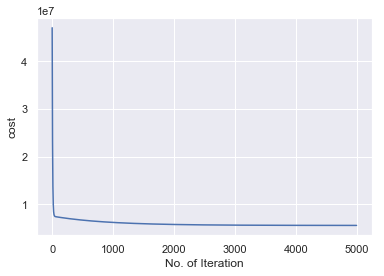

In [214]:
plt.plot(list(range(len(cost_list))),cost_list)
plt.xlabel('No. of Iteration')
plt.ylabel('cost')
plt.show()

Regression coefficients: theta0=-32.598 theta1=8.795


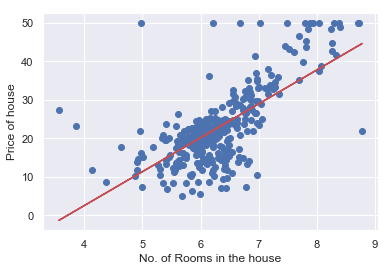

Sum of squares of errors: Training error=16705.421 Testing error=5390.151


In [217]:
shuffle_df=df.sample(frac=1)
train_size = int(0.7 * len(df))
train_df=shuffle_df[:train_size]
test_df=shuffle_df[train_size:]

theta0, theta1, cost_list_train = gradient_descent(train_df["RM"], train_df["MEDV"], 0.047, 5000)
print('Regression coefficients: theta0=%.3f theta1=%.3f' % (theta0, theta1))
plot_regression_line(train_df["RM"],train_df["MEDV"],theta0,theta1)
train_sse = sum_sqrs_err(train_df["RM"],train_df["MEDV"],theta0,theta1)
test_sse = sum_sqrs_err(test_df["RM"], test_df["MEDV"], theta0, theta1)
print('Sum of squares of errors: Training error=%.3f Testing error=%.3f' % (train_sse, test_sse))